<a href="https://colab.research.google.com/github/alarazin/StarMap/blob/main/cv_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
cv2.__version__
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

'4.1.2'

In [26]:


def find_patch(image1, image2): #image1: patch, image2: starmap
  BRISK = cv2.BRISK_create()
  kp1, descriptors1 = BRISK.detectAndCompute(image1, None)
  kp2, descriptors2 = BRISK.detectAndCompute(image2, None)

  BFMatcher = cv2.BFMatcher(normType = cv2.NORM_HAMMING,
                          crossCheck = True)
  matches = BFMatcher.match(queryDescriptors = descriptors1,
                            trainDescriptors = descriptors2)
  matches = sorted(matches, key = lambda x: x.distance)

  good=matches[:11]
  MIN_MATCH_COUNT=10
  if len(good)>=MIN_MATCH_COUNT:
      src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
      dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
      M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
      matchesMask = mask.ravel().tolist()
      h,w = image1.shape
      pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
      dst = cv2.perspectiveTransform(pts,M)
      img_box = cv2.polylines(image2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

  else:
      print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
      matchesMask = None

  draw_params = dict(matchColor = (0,255,0), 
                    singlePointColor = None,
                    matchesMask = matchesMask,
                    flags = 2)

  img_box_kp = cv2.drawMatches(image1,kp1,image2,kp2,good,None,**draw_params)
  return img_box_kp, np.int32(dst)





In [32]:
small = cv2.imread('Small_area.png', cv2.IMREAD_GRAYSCALE)
small_r = cv2.imread('Small_area_rotated.png', cv2.IMREAD_GRAYSCALE)
big_img =cv2.imread('StarMap.png', cv2.IMREAD_GRAYSCALE)

Corner points:
 [[[855 150]]

 [[855 261]]

 [[967 262]]

 [[968 149]]]


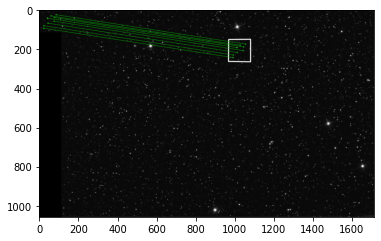

In [30]:
output_img, corners= find_patch(small, big_img)
plt.imshow(output_img)
print("Corner points:\n", corners)

Corner points:
 [[[420 639]]

 [[498 770]]

 [[630 692]]

 [[553 560]]]


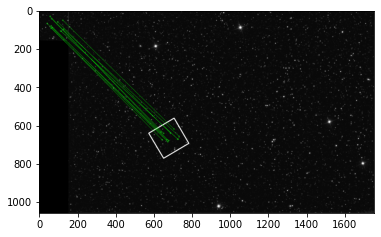

In [33]:
output_img_r, corners_r= find_patch(small_r, big_img)
plt.imshow(output_img_r)
print("Corner points:\n", corners_r)